# NYC Airbnb Supervised Machine Learning

## This script contains the following
### 1. Importing Libraries and data
### 2. Data Cleaning
### 3. Data prep for Regression Analysis
### 4. Regression Analysis
### 5. Using a 2nd Variable for Regression Analysis
### 6. Export Data

## 1. Import Librarise and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
#set path
path = r'/Users/shelbysteele/Documents/Airbnb NYC Rental Analysis'

In [5]:
#import data
df = pd.read_csv(os.path.join(path, '02 Data','Prepared Data', 'NYC_cleaned_data2.csv'))

In [6]:
#enable graphs apprear without calling them
%matplotlib inline

## 2. Data Cleaning

In [7]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'host_identity_verified', 'borough',
       'neighborhood', 'latitude', 'longitude', 'instant_bookable',
       'cancellation_policy', 'room_type', 'construction_year', 'price',
       'service_fee', 'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'review_rate_number', 'listings_per_host',
       'Days booked', 'fee_category', 'revenue'],
      dtype='object')

In [8]:
#drop Unnamed: 0 column
df.drop(columns = {'Unnamed: 0.1', 'Unnamed: 0'}, inplace = True)

In [9]:
df.columns

Index(['host_identity_verified', 'borough', 'neighborhood', 'latitude',
       'longitude', 'instant_bookable', 'cancellation_policy', 'room_type',
       'construction_year', 'price', 'service_fee', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'review_rate_number', 'listings_per_host', 'Days booked',
       'fee_category', 'revenue'],
      dtype='object')

In [10]:
#checking for missing values
df.isnull().sum()

host_identity_verified    0
borough                   0
neighborhood              0
latitude                  0
longitude                 0
instant_bookable          0
cancellation_policy       0
room_type                 0
construction_year         0
price                     0
service_fee               0
minimum_nights            0
number_of_reviews         0
last_review               0
reviews_per_month         0
review_rate_number        0
listings_per_host         0
Days booked               0
fee_category              0
revenue                   0
dtype: int64

In [11]:
#checking for duplicates
dups = df.duplicated()

In [12]:
#chekcing output
dups.shape

(81563,)

/Users/shelbysteele/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Days booked', ylabel='Density'>

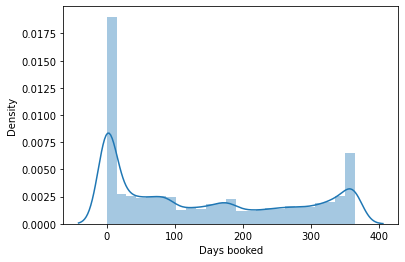

In [16]:
#checking out extreme outliers
sns.distplot(df['Days booked'], bins=25)

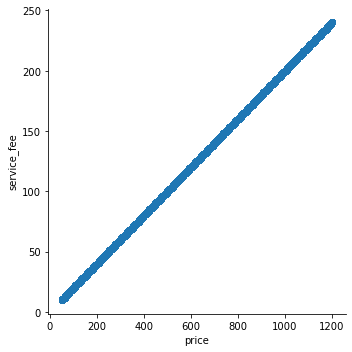

In [17]:
#creating a scatterplot with 'price' and 'service fee'
sns.lmplot(x = 'price', y = 'service_fee', data = df)

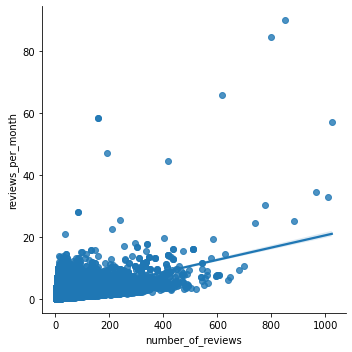

In [18]:
#creating a scatterplot with 'reviews per month' and 'number of reviews'
sns.lmplot(x = 'number_of_reviews', y = 'reviews_per_month', data = df)

## 3. Data Prep for Regression Analysis

### Hypotheses to test
##### If a rental has an increased price, than the service fee will also increase
##### If a rental host has more listings, than it should lead to an increased rate of reviews

In [19]:
#reshape the varibles into NumPy arrays and put them into separate objects
X = df['price'].values.reshape(-1,1)
y = df['service_fee'].values.reshape(-1,1)

In [20]:
#checking new array of X
X

array([[ 966.],
       [ 142.],
       [ 204.],
       ...,
       [ 982.],
       [ 946.],
       [1043.]])

In [21]:
#checking new array of y
y

array([[193.],
       [ 28.],
       [ 41.],
       ...,
       [196.],
       [189.],
       [209.]])

In [22]:
#split data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 4. Regression Analysis

In [23]:
#create a regression object to fit into the training set
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [24]:
#predict the values of y using X
y_predicted = regression.predict(X_test)

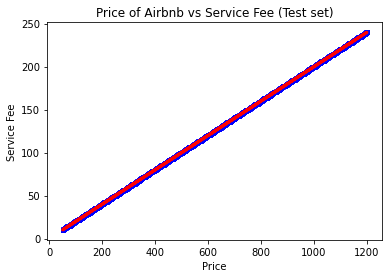

In [25]:
#create a plot that shows the regression line from the model on test set
plot_test = plt
plot_test.scatter(X_test, y_test, color='blue', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Price of Airbnb vs Service Fee (Test set)')
plot_test.xlabel('Price')
plot_test.ylabel('Service Fee')
plot_test.show()

In [26]:
#create objects that contain the model statistics
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [27]:
#print the model summary statistics to evaluate the performance of the model
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.20000951]]
Mean squared error:  0.07967949215117233
R2 score:  0.9999818283417746


1. The slope indicated a positive relationshipe between price and service_fee   meaning that as price increases, so does the fee
2. The MSE is small meaning that the regression line is a good ft
3. The R2 score is close to 1 which indicates a good fit

In [28]:
#create a dataframe comparing the actual and predicted values
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,230.0,230.206069
1,31.0,31.196607
2,209.0,208.605042
3,166.0,166.403036
4,38.0,37.796921
5,23.0,23.196227
6,142.0,142.201885
7,76.0,75.798728
8,151.0,151.202313
9,180.0,180.203692


The model overall is a good predictor is service_fee and price. Since there were no extremem values removed from the dataset, there is minimal bias programmed into the model

## Using a 2nd Variable for Regression Analysis 

In [87]:
#reshape the varibles into NumPy arrays and put them into separate objects
X_2 = df['listings_per_host'].values.reshape(-1,1)
y_2 = df['number_of_reviews'].values.reshape(-1,1)

In [88]:
#split data into training set and test set
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [89]:
#create a regression object to fit into the training set
regression = LinearRegression()
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [90]:
#predict the values of y using X
y_predicted_2 = regression.predict(X_test_2)

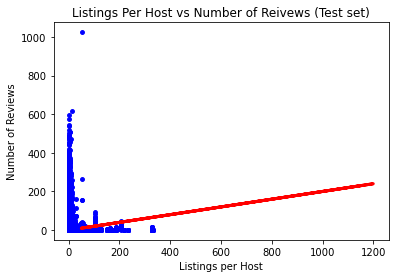

In [91]:
#create a plot that shows the regression line from the model on test set
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='blue', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Listings Per Host vs Number of Reivews (Test set)')
plot_test.xlabel('Listings per Host')
plot_test.ylabel('Number of Reviews')
plot_test.show()

In [79]:
#create objects that contain the model statistics
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [80]:
#print the model summary statistics to evaluate the performance of the model
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.14540237]]
Mean squared error:  22111.265063602714
R2 score:  -0.25706874701610904


1. The slope indicated a negative relationshipe between listings per host and reviews
2. The MSE is large meaning that the regression line is not a good fit
3. The R2 score is close to o which indicates a bad fit

In [81]:
#create a dataframe comparing the actual and predicted values
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,331.0,230.206069
1,73.0,31.196607
2,179.0,208.605042
3,298.0,166.403036
4,110.0,37.796921
5,24.0,23.196227
6,365.0,142.201885
7,179.0,75.798728
8,273.0,151.202313
9,365.0,180.203692


The model overall is not a predictor of number of reviews if a host has multiple properties. Since there were no extremem values removed from the dataset, there is minimal bias programmed into the model

## 6. Exporting Data

In [92]:
#exporting data
df.to_csv(os.path.join(path, '02 Data','Prepared Data', 'NYC_cleaned_data2.csv'))